In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind

In [5]:
df = pd.read_excel("data/MOS.xlsx", sheet_name="Sheet1")

In [6]:
df.columns

Index(['Unnamed: 0', 'Sentence', 'emotion', 'id', 'voice', 'model', 'Clarity',
       'Prosody', 'Robotic Voice', 'Voice Pleasantness', 'person'],
      dtype='object')

In [15]:
base_speakers = [16, 16, 17, 18]

In [7]:
df["model"] = df["model"].str.replace("15adv", "15_adv")

In [8]:
df["Prosody"] = df["Prosody"].astype(np.float32)
df["Clarity"] = df["Clarity"].astype(np.float32)
df["Robotic Voice"] = df["Robotic Voice"].astype(np.float32)
df["Voice Pleasantness"] = df["Voice Pleasantness"].astype(np.float32)

In [9]:
grouped = df.groupby(["model", "emotion"]).agg({"Prosody": ["mean", "std"], "Clarity": ["mean", "std"], "Robotic Voice": ["mean", "std"], "Voice Pleasantness": ["mean", "std"]})

In [23]:
aggregation = ["mean", "var"]

In [24]:
grouped_base = df.loc[df["voice"].isin(base_speakers)].groupby(["model", "emotion"]).agg(
    {
        "Prosody": aggregation, 
        "Clarity": aggregation, 
        "Robotic Voice": aggregation, 
        "Voice Pleasantness": aggregation
    }
)

In [25]:
grouped_base.to_csv("grouped_base.csv")

In [26]:
grouped_not_base = df.loc[~df["voice"].isin(base_speakers)].groupby(["model", "emotion"]).agg(
    {
        "Prosody": aggregation, 
        "Clarity": aggregation, 
        "Robotic Voice": aggregation, 
        "Voice Pleasantness": aggregation
    }
)

In [20]:
grouped_not_base.to_csv("grouped_not_base.csv")

In [10]:
prosody_group = df.groupby(["model", "emotion"])["Prosody"].apply(lambda x: x.values)

In [12]:
df.groupby(["model", "emotion"])["id"].count()

model                 emotion 
esd_vctk_1            angry       702
                      happy       702
                      neutral     702
                      sad         702
                      surprise    702
esd_vctk_15           angry       702
                      happy       702
                      neutral     702
                      sad         702
                      surprise    702
esd_vctk_15_advloss0  angry       702
                      happy       702
                      neutral     702
                      sad         702
                      surprise    702
esd_vctk_1_advloss0   angry       702
                      happy       702
                      neutral     702
                      sad         702
                      surprise    702
esd_vctk_2            angry       702
                      happy       702
                      neutral     702
                      sad         702
                      surprise    702
Name: id, dtype: in

In [11]:
prosody_group

model                 emotion 
esd_vctk_1            angry       [5.0, 1.0, 1.0, 4.0, 4.0, 1.0, 4.0, 3.0, 3.0, ...
                      happy       [4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 3.0, 3.0, 3.0, ...
                      neutral     [4.0, 3.0, 3.0, 4.0, 4.0, 3.0, 4.0, 5.0, 5.0, ...
                      sad         [4.0, 3.0, 4.0, 4.0, 4.0, 3.0, 3.0, 2.0, 2.0, ...
                      surprise    [4.0, 4.0, 3.0, 4.0, 3.0, 2.0, 4.0, 3.0, 2.0, ...
esd_vctk_15           angry       [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, ...
                      happy       [3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, ...
                      neutral     [2.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, ...
                      sad         [2.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, ...
                      surprise    [2.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, ...
esd_vctk_15_advloss0  angry       [3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, ...
                      happy       [3.0, 2.0, 

/home/imd/miniconda3/envs/emotts/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


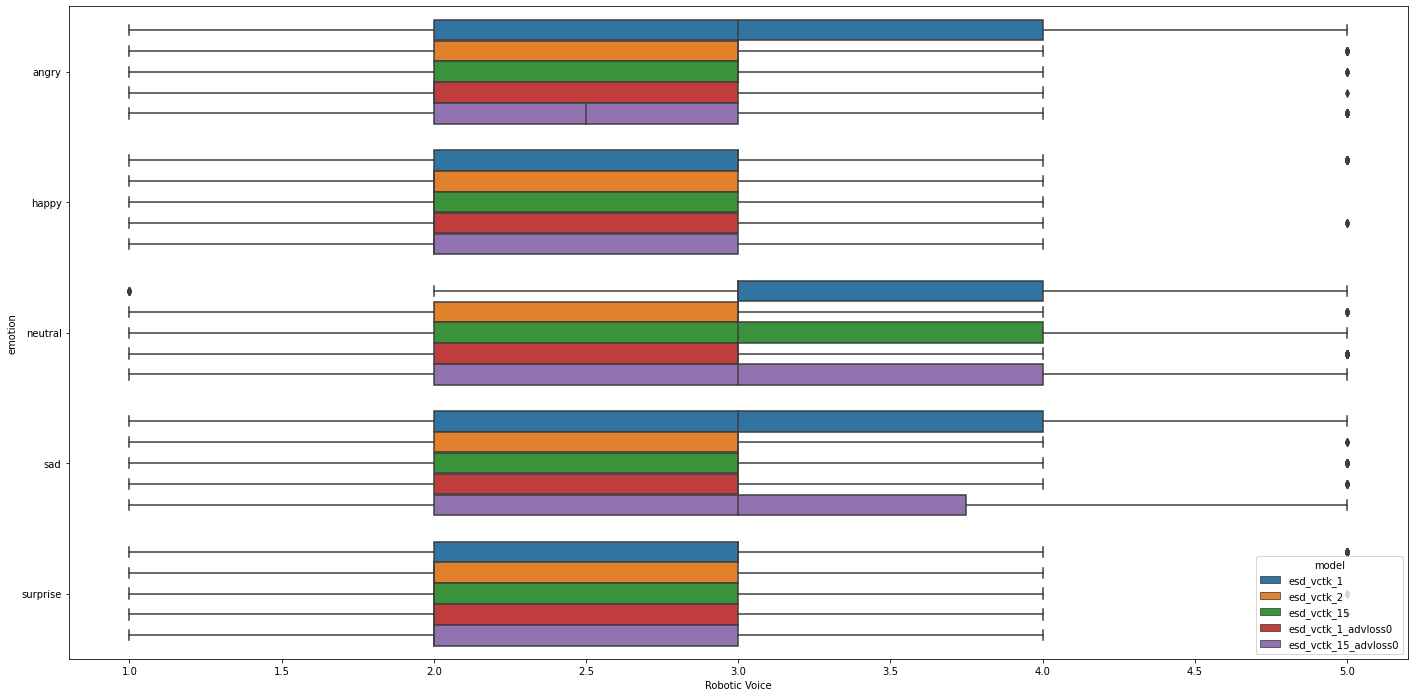

In [41]:
plt.figure(figsize=(24, 12))
sns.boxplot(df["Robotic Voice"], df["emotion"], orient="h", hue=df["model"]);